## Solving the Titanic Problem

![titanic](data/titanic/titanic.jpg)

## Goals : 
1. To predict whether a given passenger would have survived the titanic disaster or not given some information about features like ticket price, age, gender, place of embarkement, Passenger class etc.

In [71]:
import pandas as pd
import numpy as np

In [77]:
df = pd.read_csv('data/titanic/train.csv')
df.head()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
# let's see the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [86]:
# Age and cabin have missing values. Let's analyze
df.Cabin.unique()
# Let's count the total no. of na's in Cabin column and represent this as a % of total
#(df.Cabin.isnull().sum()/(df.Cabin.isnull().sum() + df.Cabin.count()))*100
# This shows that 77% of data in the column Cabin is blank or null. So, let's choose to drop this column from the dataset.
# Also, with high number of distinct values with no pattern as such, this column does not add value to extract any feature
# which is relevant for the problem statement

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [87]:
# name and ticket no. are purely text/alpha-numeric columns.Not able to derive any valuable feature out of them.
# Hence, dropping them also from the dataset along with Cabin
df1=df.drop(['Name','Ticket','Cabin'],axis=1)
#df.Embarked.unique()
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [88]:
# Sex column has text data.Machine learning models only understand numbers. Hence, this needs to be converted to some numerical 
# information. We do this by replacing {'Male','Female'} values in the column by {1,0} where 1 indicates 'Male' and 0 indicates
# 'Female'
df1['Sex'] = df1['Sex'].map({'male':1,'female':0})
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [95]:
# We also see the Embarked columns having 3 values S,C and Q. Let's replace them by values 1,2,3
# check how many null values are there in the column 'Embarked'
df1.Embarked.isnull().sum()

# Calculate the mode of this column
mode = df1.Embarked.mode()
mode.values[0]
# Fill the null values with the mode
df1.Embarked.fillna(mode.values[0],inplace=True)

# Check if there are any null values still
df1[df1.Embarked.isna()==True]

df1.info()
# replace the character values with numerical values in the column
df1['Embarked'] = df1['Embarked'].map({'S':1,'C':2,'Q':3}).astype(int)

df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 62.7+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


In [84]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int32
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.2 KB


In [24]:
# we still need to treat missing values in column Age
# let's group by Pclass and Sex and check mean, median, mode of Age
grp = df1.groupby(['Sex','Pclass'])
grp.Age.agg({'mean':np.mean,'median':np.median})

C:\Users\Amit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


mean  median
Sex Pclass                   
0   1       34.611765    35.0
    2       28.722973    28.0
    3       21.750000    21.5
1   1       41.281386    40.0
    2       30.740707    30.0
    3       26.507589    25.0

In [96]:
df1.Age.fillna(df1.Age.mean(),inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int32
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.2 KB


In [97]:
# Let's create an object for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()

# let's define the feature set
X = df1[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df1['Survived']

# let's create the train and test data
trainX, testX,trainy,testy = train_test_split(X,y)


In [98]:
model.fit(trainX,trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
model.intercept_

array([3.5284472])

In [100]:
model.coef_

array([[-0.91403027, -2.39780382, -0.0305625 , -0.26822695, -0.12546432,
         0.00573124,  0.39344946]])

In [101]:
model.score(testX,testy)

0.7892376681614349

[[129  24]
 [ 23  47]]


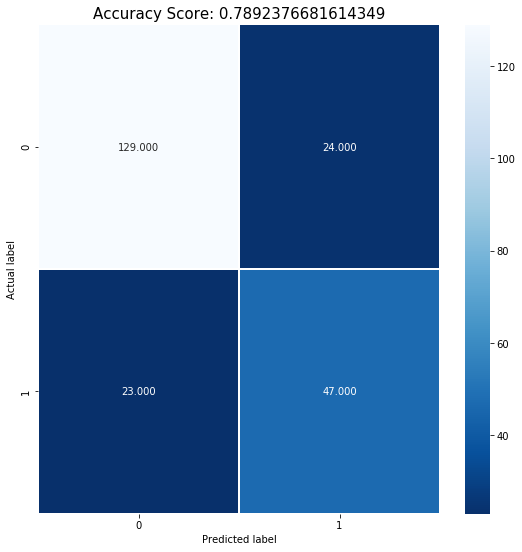

In [102]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(testy, model.predict(testX))
print(cm)

# visually appealing way to see the confusion matric
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(testX,testy))
plt.title(all_sample_title, size = 15);

In [106]:
# Cross Validation accuracy

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
#model = LogisticRegression()
#scoring = 'accuracy'
results = model_selection.cross_val_score(model, trainX, trainy, cv=kfold)
results
#print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

array([0.80597015, 0.82089552, 0.7761194 , 0.74626866, 0.8358209 ,
       0.71641791, 0.7761194 , 0.85074627, 0.81818182, 0.78787879])

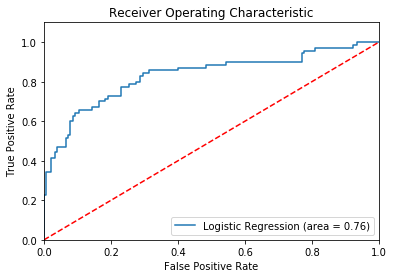

In [103]:
# ROC Curves and AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(testy, model.predict(testX))
fpr, tpr, thresholds = roc_curve(testy, model.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Ignore the below code for now

In [34]:
#def treat_age(s,p):
#    m = df1[(df1.Sex == s) & (df1.Pclass == p)].Age.median()
#    return m
#df1.Age = df1.apply(treat_age)

# let's iterate over the dataset to set age values
#for i in range(0,len(df1.Sex.unique())):
#    for j in range(0,len(df1.Pclass.unique())):
#        df1[df1[(df1.Sex == i) & (df1.Pclass == j+1)].isna() == True] = df1[(df1.Sex == i) & (df1.Pclass == j+1)].Age.median()
#                              

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,1,NaN,0,0,8.4583,3
17,18,1,2,1,NaN,0,0,13.0000,1
19,20,1,3,0,NaN,0,0,7.2250,2
26,27,0,3,1,NaN,0,0,7.2250,2
28,29,1,3,0,NaN,0,0,7.8792,3
